In [322]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [323]:
path = "/content/drive/My Drive/Tugas Akhir/dataset"

# Decision Tree Classification Air Pollution

## Attribute Information :
- <b>Tanggal </b> : Tanggal pengambilan data sensor
- <b> PM10 </b> : Pengukuran Particulate Matter, partikel udara yang berukuran lebih kecil dari 10 mikron (mikrometer).
- <b> SO2 </b> : Pengukuran Sulfur Dioksida.
- <b> CO </b> : Pengukuran Karbon Monoksida, gas tidak berwarna, tidak berbau, dan beracun, dihasilkan dari proses pembakaran tidak sempurna, dapat mengikat oksigen dalam hemoglobin darah.
- <b> O3 </b> : Pengukuran Ozon.
- <b> NO2 </b> : Pengukuran Nitrogen Dioksida.
- <b> Category </b> : Category dari polusi udara.
- <b> Lokasi SPKU </b> : Lokasi atau tempat pengambilan data (Stasiun Pemantauan Kualitas Udara)

## Import library yang diperlukan

In [324]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay


## Importing the dataset

In [325]:
df = pd.read_csv(os.path.join(path,"ispu-jakarta-2010-2021.csv"))
df.drop(columns=["critical", "max"], inplace=True)
df.head(10)

tanggal pm10 so2  co  o3 no2 categori lokasi_spku
0   1/1/2010   60   4  73  27  14   SEDANG        DKI1
1   1/2/2010   32   2  16  33   9     BAIK        DKI1
2   1/3/2010   27   2  19  20   9     BAIK        DKI1
3   1/4/2010   22   2  16  15   6     BAIK        DKI1
4   1/5/2010   25   2  17  15   8     BAIK        DKI1
5   1/6/2010   30   3  22  19  11     BAIK        DKI1
6   1/7/2010   41   4  24  27  13     BAIK        DKI1
7   1/8/2010   64   8  51  19  15   SEDANG        DKI1
8   1/9/2010   55   5  39  23  16   SEDANG        DKI1
9  1/10/2010   34   5  23  26  12     BAIK        DKI1

# EDA (Exploratory Data Analysis)

<ipython-input-326-d2b0335c010e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['tanggal'] = pd.to_datetime(df['tanggal'])


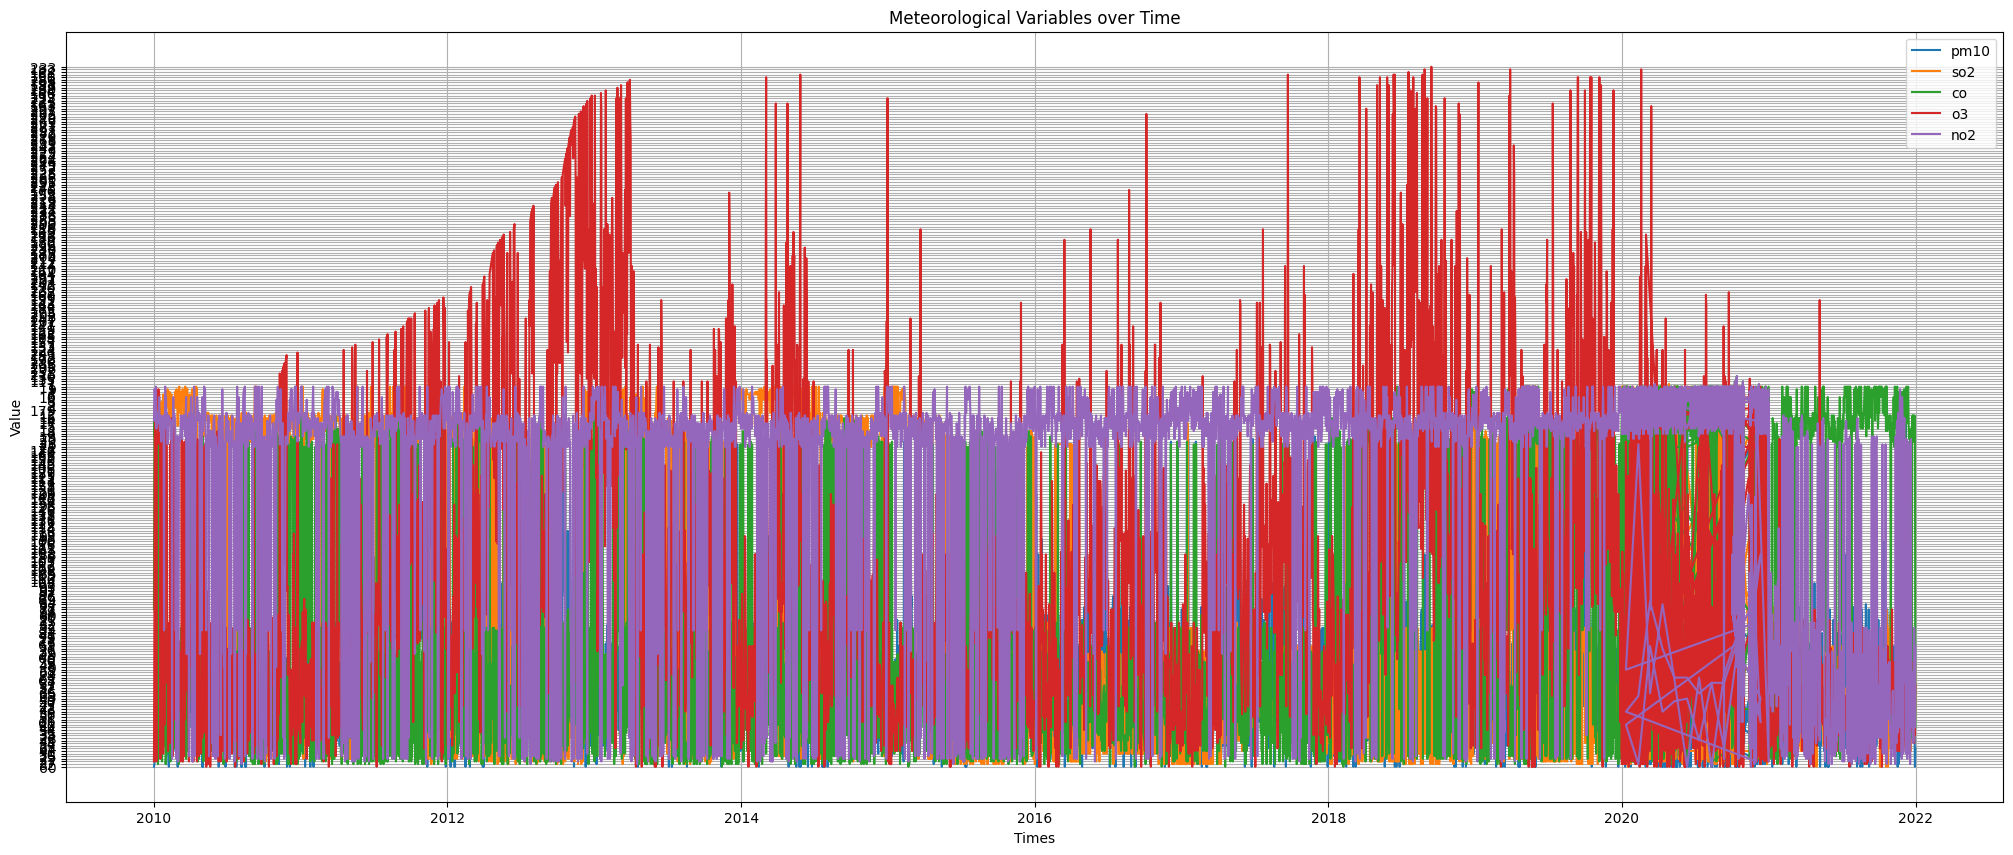

In [326]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

df.set_index('tanggal', inplace=True)

# Select the variables to plot (pm10, so2, co, o3, no2)
variables = ['pm10', 'so2', 'co', 'o3', 'no2']

plt.figure(figsize=(25, 10))
for variable in variables:
    plt.plot(df.index, df[variable], label=variable)

plt.title('Meteorological Variables over Time')
plt.xlabel('Times')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


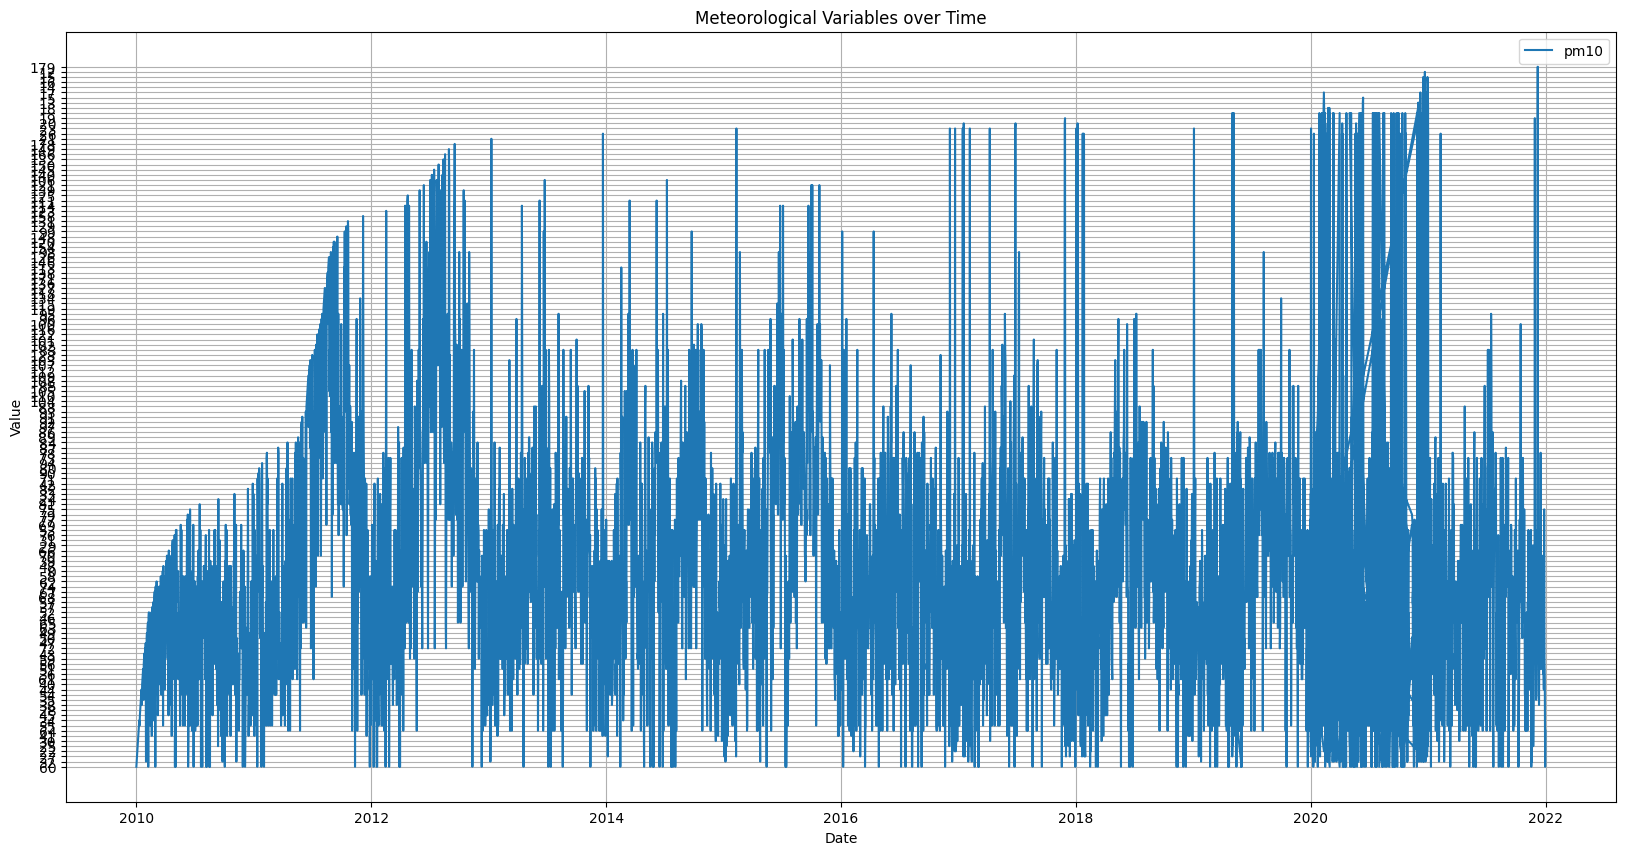

In [327]:
variables = ['pm10']

plt.figure(figsize=(20, 10))
for variable in variables:
    plt.plot(df.index, df[variable], label=variable)

plt.title('Meteorological Variables over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


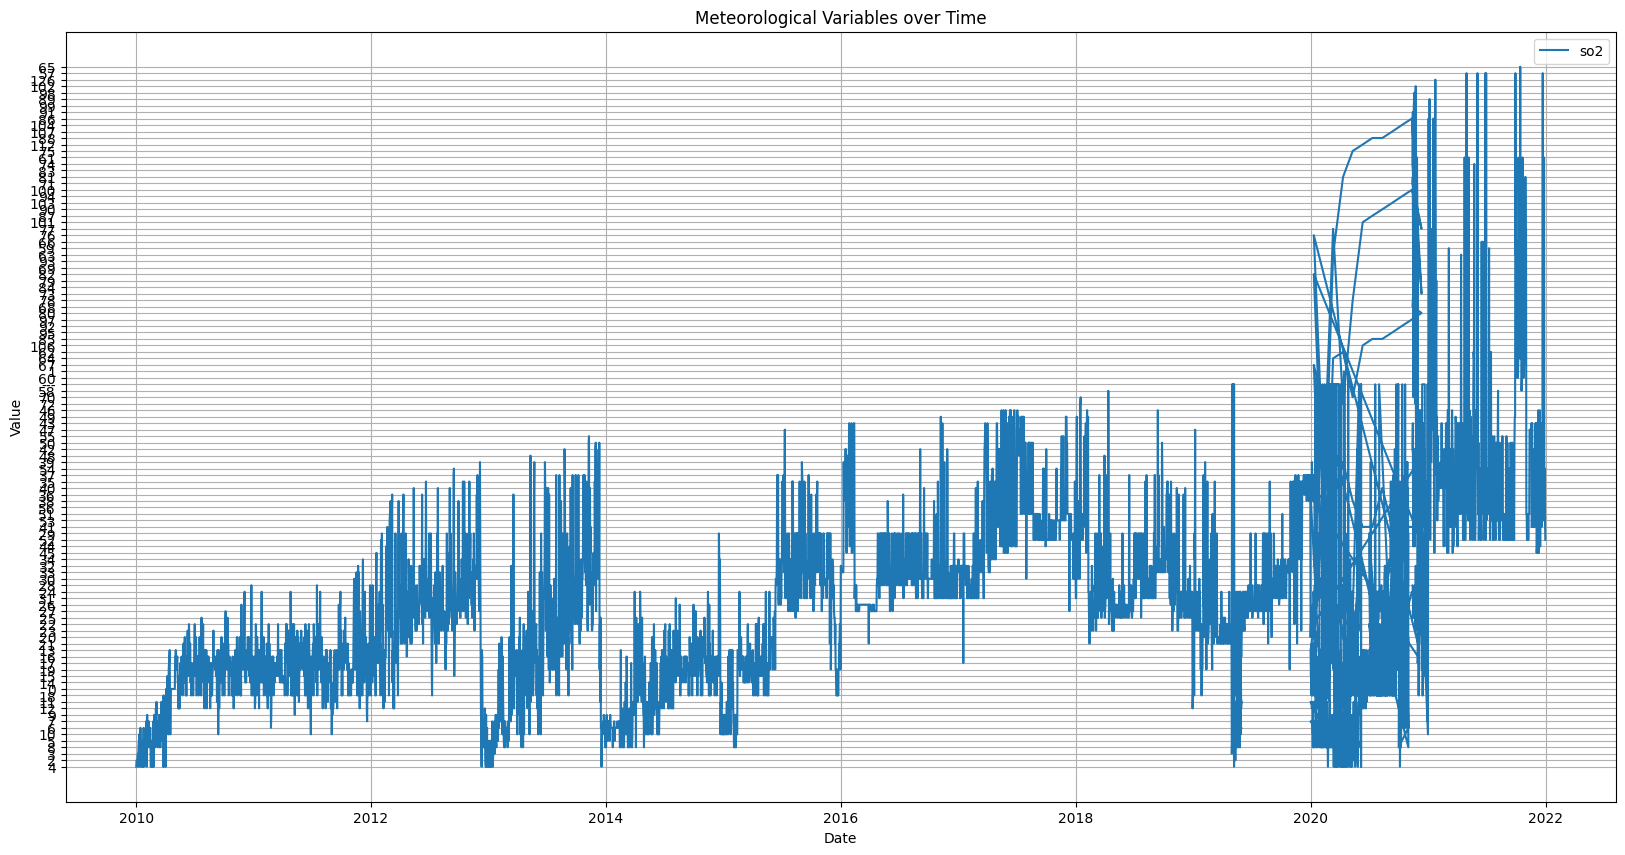

In [328]:
variables = ['so2']

plt.figure(figsize=(20, 10))
for variable in variables:
    plt.plot(df.index, df[variable], label=variable)

plt.title('Meteorological Variables over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


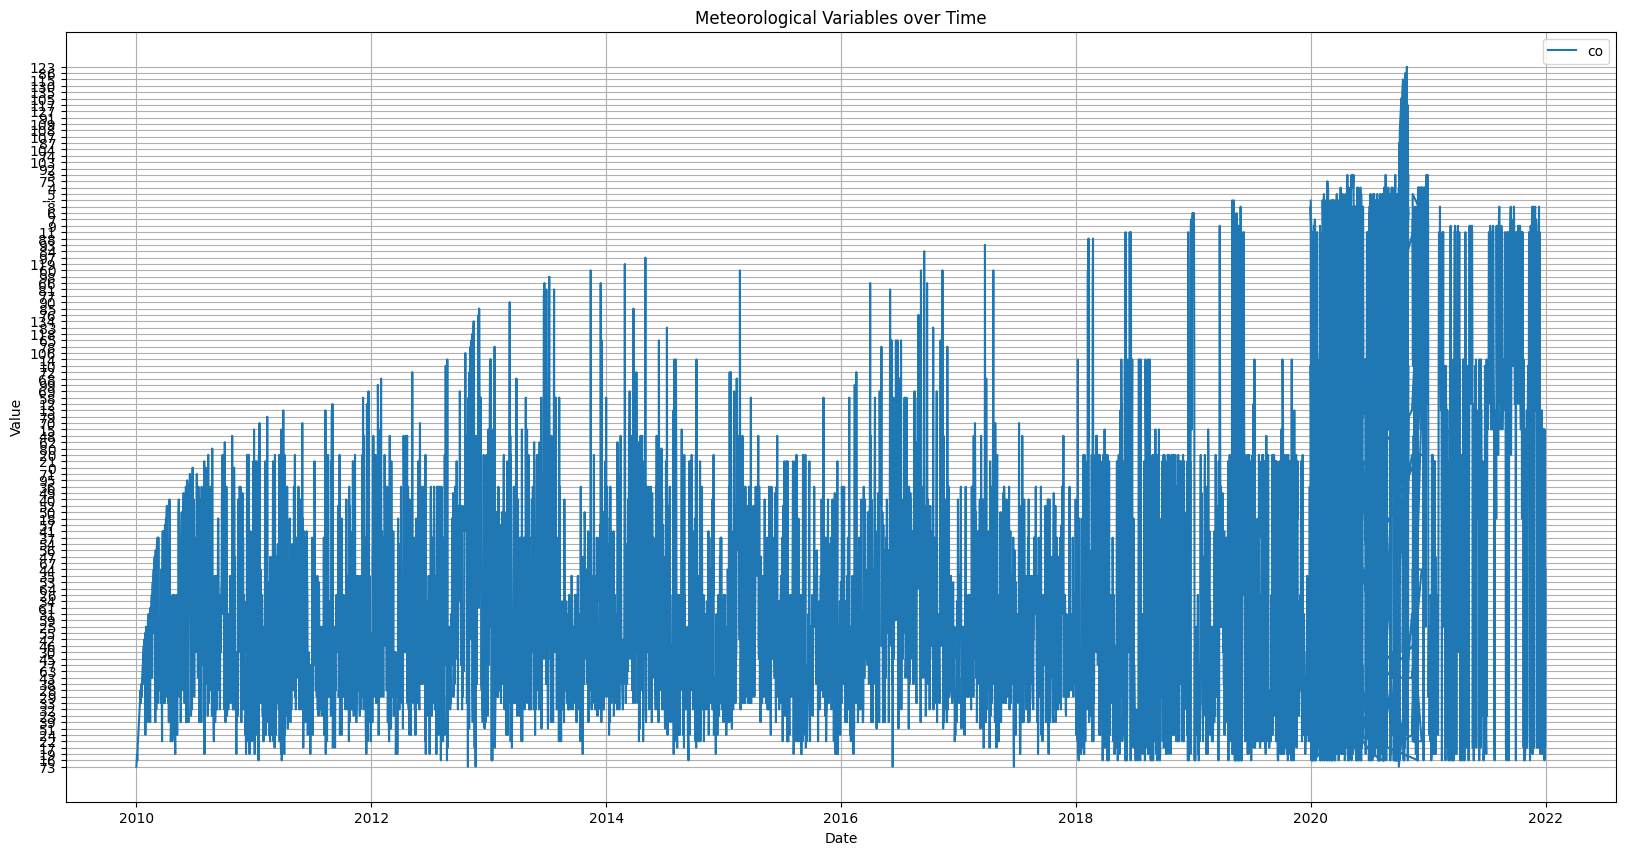

In [329]:
variables = ['co']

plt.figure(figsize=(20, 10))
for variable in variables:
    plt.plot(df.index, df[variable], label=variable)

plt.title('Meteorological Variables over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


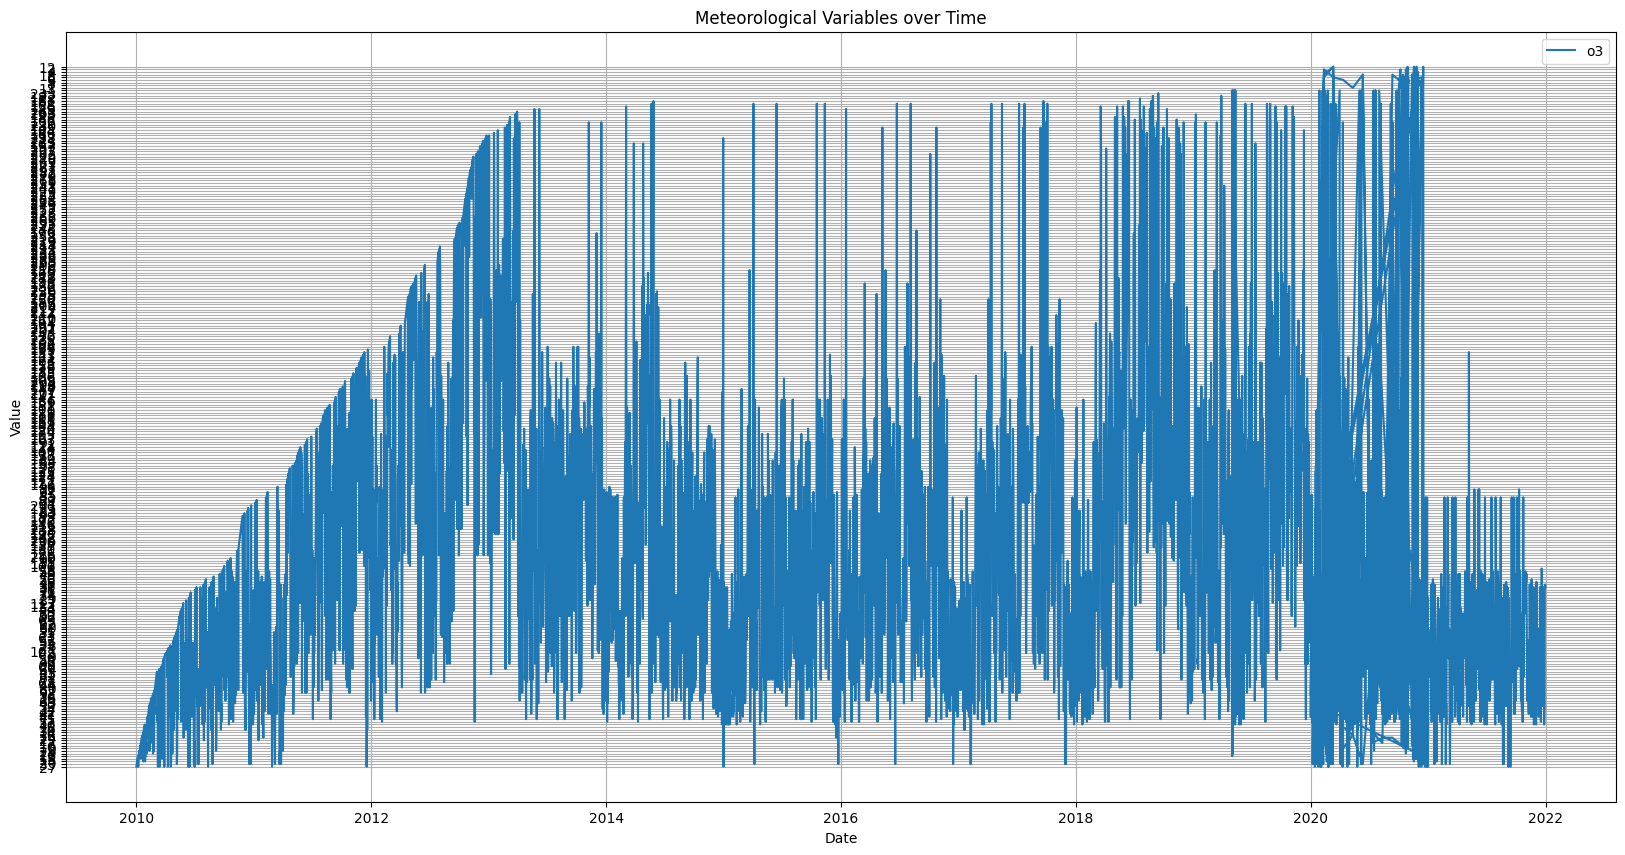

In [330]:
variables = ['o3']

plt.figure(figsize=(20, 10))
for variable in variables:
    plt.plot(df.index, df[variable], label=variable)

plt.title('Meteorological Variables over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


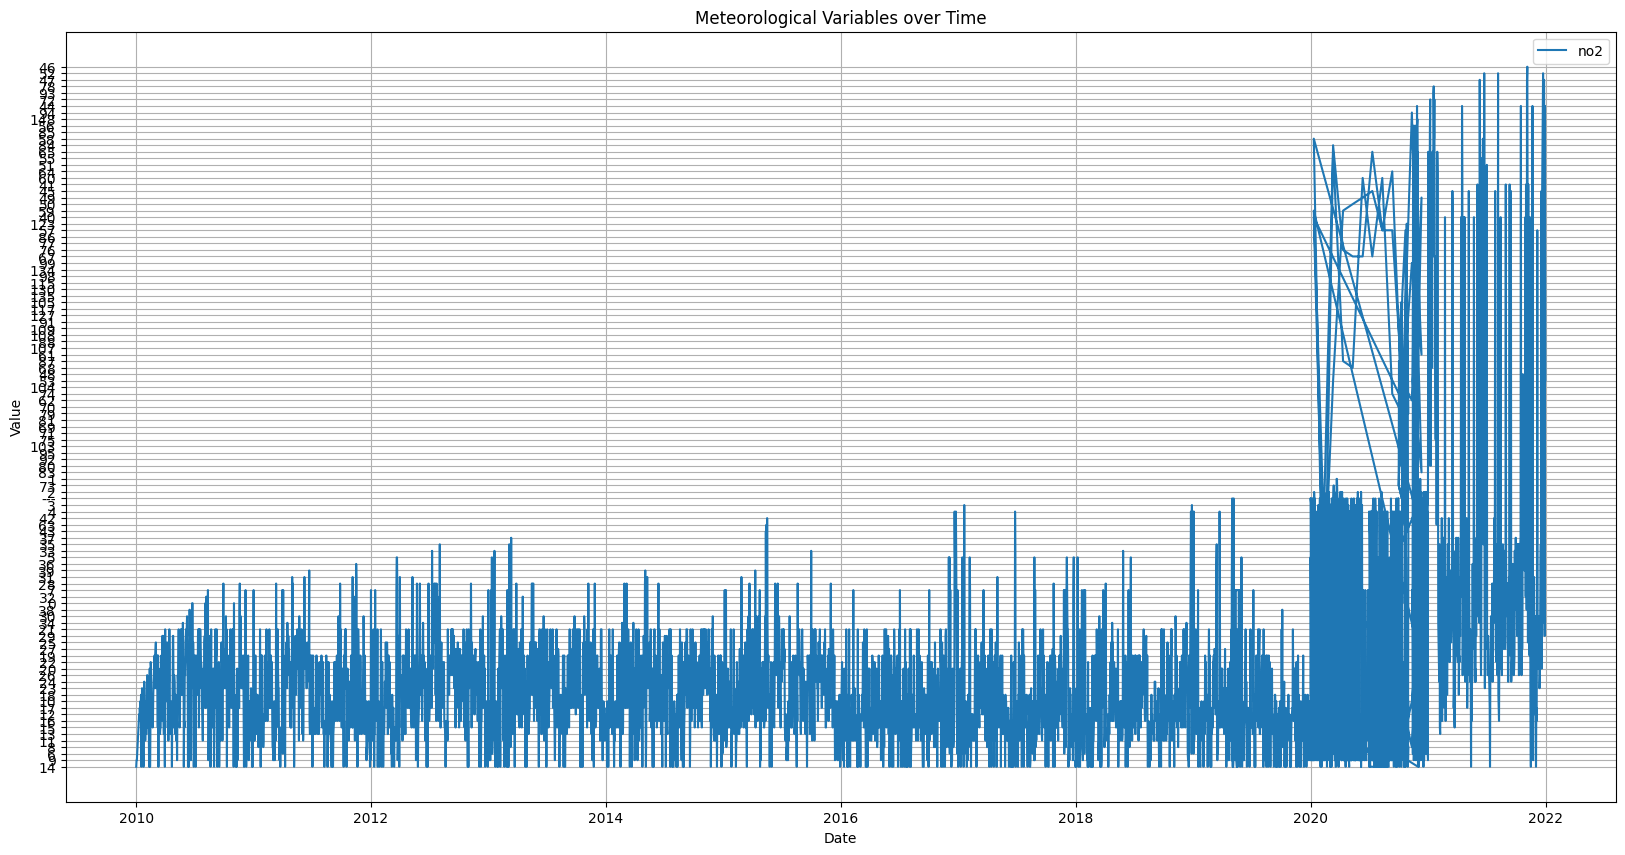

In [331]:
variables = ['no2']

plt.figure(figsize=(20, 10))
for variable in variables:
    plt.plot(df.index, df[variable], label=variable)

plt.title('Meteorological Variables over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5969 entries, 2010-01-01 to 2021-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pm10         5969 non-null   object
 1   so2          5969 non-null   object
 2   co           5969 non-null   object
 3   o3           5969 non-null   object
 4   no2          5969 non-null   object
 5   categori     5969 non-null   object
 6   lokasi_spku  5966 non-null   object
dtypes: object(7)
memory usage: 373.1+ KB


In [333]:
# sns.pairplot(df[['pm10', 'so2', 'co', 'o3', 'no2', 'categori']], hue = "categori")

In [334]:
g = df.columns.to_series().groupby(df.dtypes).groups
g

{object: ['pm10', 'so2', 'co', 'o3', 'no2', 'categori', 'lokasi_spku']}

In [335]:
df["categori"].value_counts()

SEDANG                3576
TIDAK SEHAT           1511
BAIK                   662
SANGAT TIDAK SEHAT     199
TIDAK ADA DATA          21
Name: categori, dtype: int64

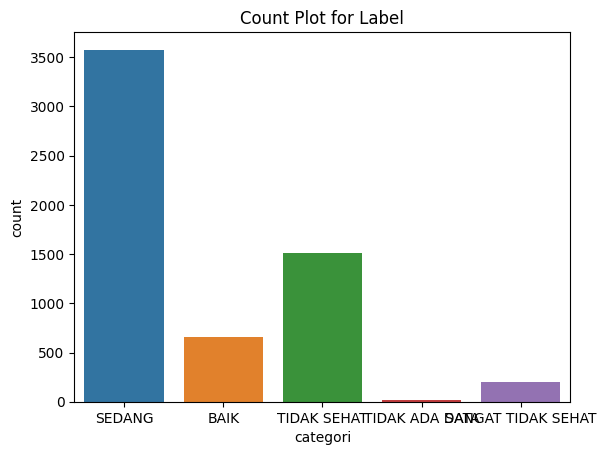

In [336]:
sns.countplot(x=df.categori)
plt.title('Count Plot for Label')
plt.show()

# Check Missing Data

In [337]:
df = df[df['categori'] != 'TIDAK ADA DATA']

df.reset_index(drop=True, inplace=True)
df

pm10 so2  co  o3 no2     categori lokasi_spku
0      60   4  73  27  14       SEDANG        DKI1
1      32   2  16  33   9         BAIK        DKI1
2      27   2  19  20   9         BAIK        DKI1
3      22   2  16  15   6         BAIK        DKI1
4      25   2  17  15   8         BAIK        DKI1
...   ...  ..  ..  ..  ..          ...         ...
5943   75  61  23  40  47  TIDAK SEHAT        DKI4
5944   59  53  16  34  33       SEDANG        DKI4
5945   61  54  15  37  29       SEDANG        DKI4
5946   60  53  17  38  44  TIDAK SEHAT        DKI4
5947   64  52  44  37  53       SEDANG        DKI4

[5948 rows x 7 columns]

### Now 5949 sample data

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5948 entries, 0 to 5947
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pm10         5948 non-null   object
 1   so2          5948 non-null   object
 2   co           5948 non-null   object
 3   o3           5948 non-null   object
 4   no2          5948 non-null   object
 5   categori     5948 non-null   object
 6   lokasi_spku  5948 non-null   object
dtypes: object(7)
memory usage: 325.4+ KB


# Check apakah ada data yang hiang, disini tidak ada data yang hilang akan tetapi ada data dengan nilai "---"

In [339]:
df.isnull().any()

pm10           False
so2            False
co             False
o3             False
no2            False
categori       False
lokasi_spku    False
dtype: bool

In [340]:
missing_values = df.isna()

# Cek jumlah missing data setiap kolom
missing_values_count = missing_values.sum()
print(missing_values_count)

pm10           0
so2            0
co             0
o3             0
no2            0
categori       0
lokasi_spku    0
dtype: int64


# Handling Missing Value with replace data "---"

# replace data "---"

In [341]:
df.replace(to_replace='---', value=np.NaN, inplace=True)

df

pm10 so2  co  o3 no2     categori lokasi_spku
0      60   4  73  27  14       SEDANG        DKI1
1      32   2  16  33   9         BAIK        DKI1
2      27   2  19  20   9         BAIK        DKI1
3      22   2  16  15   6         BAIK        DKI1
4      25   2  17  15   8         BAIK        DKI1
...   ...  ..  ..  ..  ..          ...         ...
5943   75  61  23  40  47  TIDAK SEHAT        DKI4
5944   59  53  16  34  33       SEDANG        DKI4
5945   61  54  15  37  29       SEDANG        DKI4
5946   60  53  17  38  44  TIDAK SEHAT        DKI4
5947   64  52  44  37  53       SEDANG        DKI4

[5948 rows x 7 columns]

In [342]:
df[['pm10', 'so2', 'co', 'o3', 'no2']] = df [['pm10', 'so2', 'co', 'o3', 'no2']].apply(pd.to_numeric)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5948 entries, 0 to 5947
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm10         5911 non-null   float64
 1   so2          5899 non-null   float64
 2   co           5923 non-null   float64
 3   o3           5934 non-null   float64
 4   no2          5904 non-null   float64
 5   categori     5948 non-null   object 
 6   lokasi_spku  5948 non-null   object 
dtypes: float64(5), object(2)
memory usage: 325.4+ KB


# Setelah direplace, data tersebut kosong diisi dengan rata - rata

In [343]:
def correction (col):
    df[col] = df.groupby('lokasi_spku') [col].transform(lambda x: x.fillna(x.mean()))

In [344]:
list_col = df.columns[7:7]

for i in list_col:
    correction(i)

df.fillna(method='ffill', inplace=True)

df.info

<bound method DataFrame.info of       pm10   so2    co    o3   no2     categori lokasi_spku
0     60.0   4.0  73.0  27.0  14.0       SEDANG        DKI1
1     32.0   2.0  16.0  33.0   9.0         BAIK        DKI1
2     27.0   2.0  19.0  20.0   9.0         BAIK        DKI1
3     22.0   2.0  16.0  15.0   6.0         BAIK        DKI1
4     25.0   2.0  17.0  15.0   8.0         BAIK        DKI1
...    ...   ...   ...   ...   ...          ...         ...
5943  75.0  61.0  23.0  40.0  47.0  TIDAK SEHAT        DKI4
5944  59.0  53.0  16.0  34.0  33.0       SEDANG        DKI4
5945  61.0  54.0  15.0  37.0  29.0       SEDANG        DKI4
5946  60.0  53.0  17.0  38.0  44.0  TIDAK SEHAT        DKI4
5947  64.0  52.0  44.0  37.0  53.0       SEDANG        DKI4

[5948 rows x 7 columns]>

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5948 entries, 0 to 5947
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm10         5948 non-null   float64
 1   so2          5948 non-null   float64
 2   co           5948 non-null   float64
 3   o3           5948 non-null   float64
 4   no2          5948 non-null   float64
 5   categori     5948 non-null   object 
 6   lokasi_spku  5948 non-null   object 
dtypes: float64(5), object(2)
memory usage: 325.4+ KB


In [346]:
df['categori'].value_counts()

SEDANG                3576
TIDAK SEHAT           1511
BAIK                   662
SANGAT TIDAK SEHAT     199
Name: categori, dtype: int64

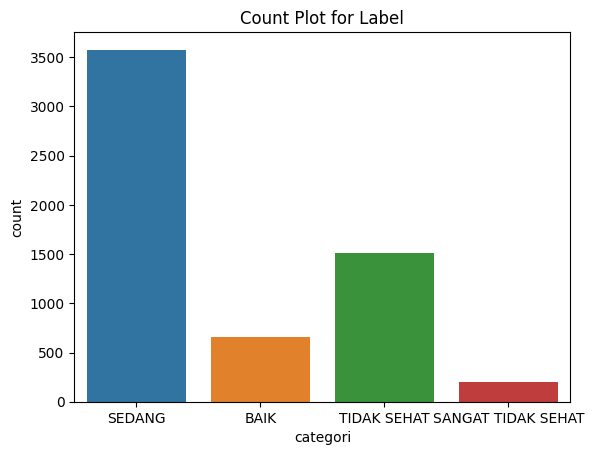

In [347]:
sns.countplot(x=df.categori)
plt.title('Count Plot for Label')
plt.show()

In [348]:
df = df.drop(['lokasi_spku'], axis=1)
df

pm10   so2    co    o3   no2     categori
0     60.0   4.0  73.0  27.0  14.0       SEDANG
1     32.0   2.0  16.0  33.0   9.0         BAIK
2     27.0   2.0  19.0  20.0   9.0         BAIK
3     22.0   2.0  16.0  15.0   6.0         BAIK
4     25.0   2.0  17.0  15.0   8.0         BAIK
...    ...   ...   ...   ...   ...          ...
5943  75.0  61.0  23.0  40.0  47.0  TIDAK SEHAT
5944  59.0  53.0  16.0  34.0  33.0       SEDANG
5945  61.0  54.0  15.0  37.0  29.0       SEDANG
5946  60.0  53.0  17.0  38.0  44.0  TIDAK SEHAT
5947  64.0  52.0  44.0  37.0  53.0       SEDANG

[5948 rows x 6 columns]

In [349]:
# df.to_csv('ispu-jakarta.csv', index=False)


<ipython-input-350-8d9d9afc2db6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pm10'])


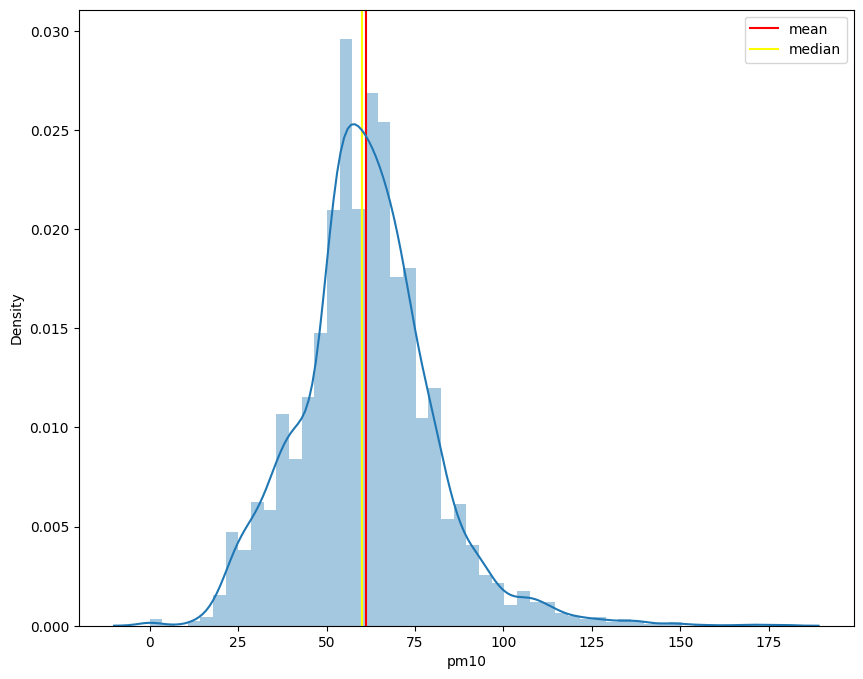

In [350]:
plt.figure(figsize = (10, 8))
plt.axvline(df['pm10'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['pm10'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['pm10'])
plt.legend()

<ipython-input-351-e954c4b83233>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['so2'])


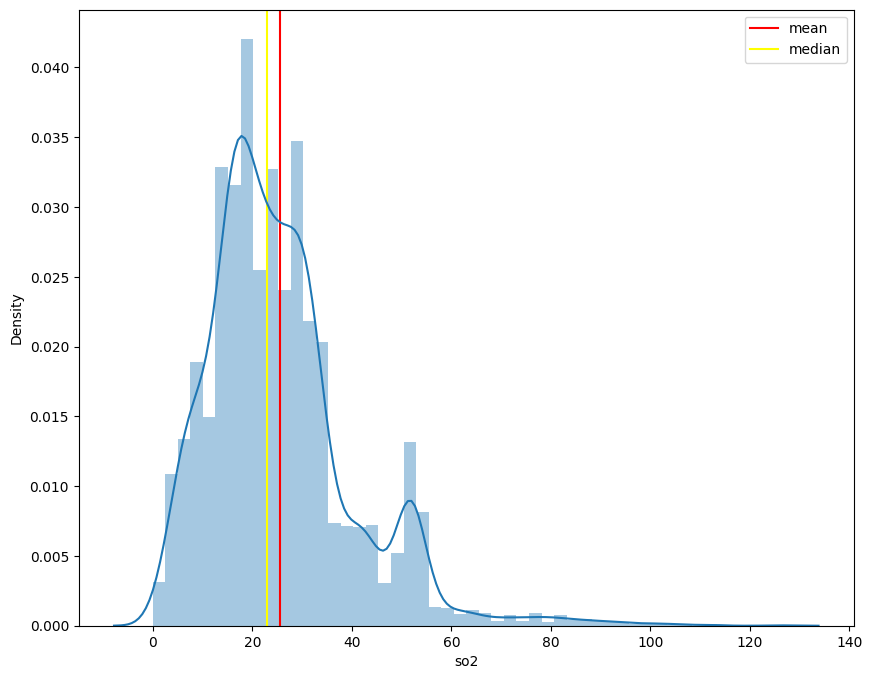

In [351]:
plt.figure(figsize = (10, 8))
plt.axvline(df['so2'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['so2'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['so2'])
plt.legend()

<ipython-input-352-110e1971c650>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['co'])


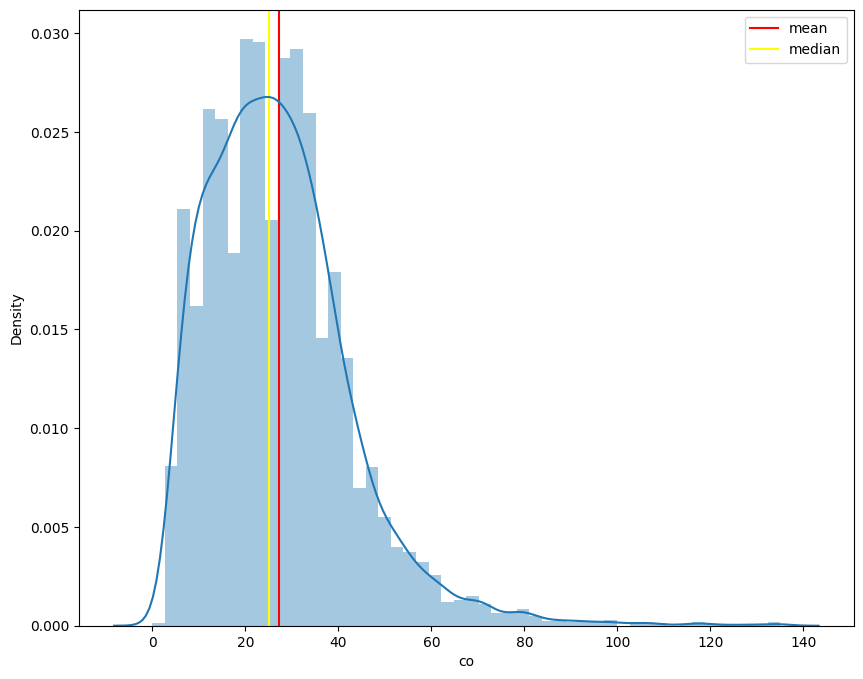

In [352]:
plt.figure(figsize = (10, 8))
plt.axvline(df['co'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['co'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['co'])
plt.legend()

<ipython-input-353-94534108d2dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['o3'])


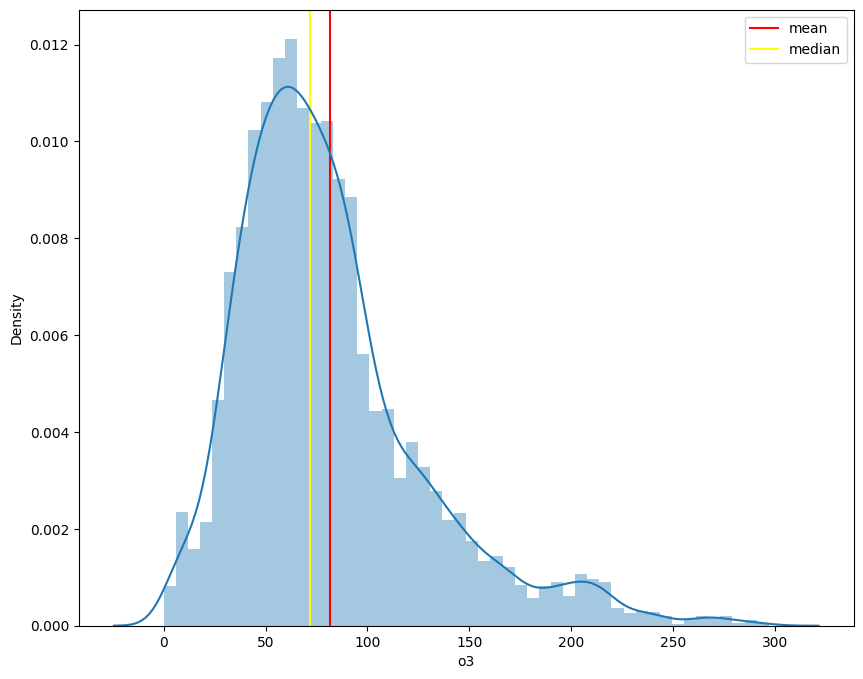

In [353]:
plt.figure(figsize = (10, 8))
plt.axvline(df['o3'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['o3'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['o3'])
plt.legend()

<ipython-input-354-a88a8ffd5214>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['no2'])


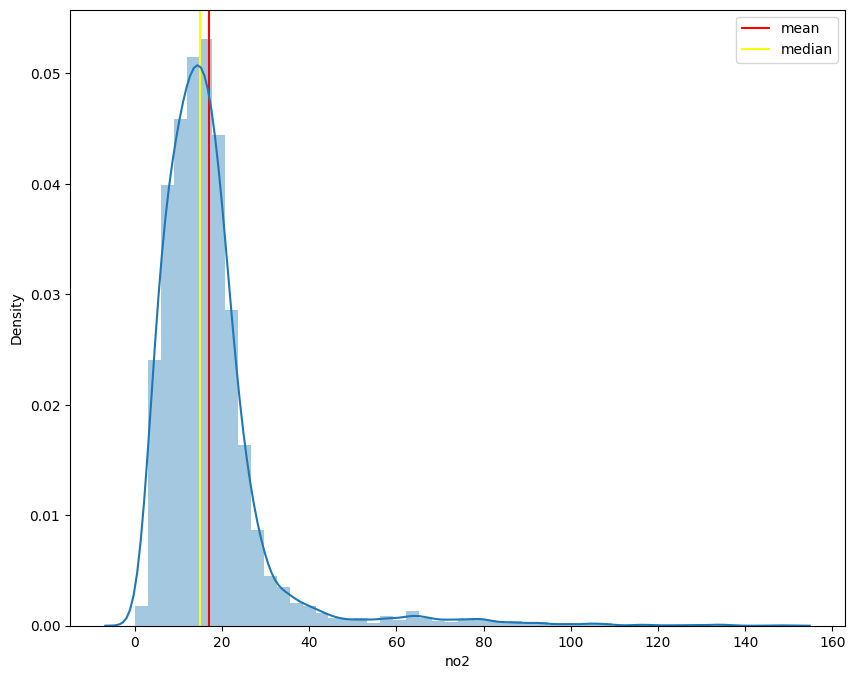

In [354]:
plt.figure(figsize = (10, 8))
plt.axvline(df['no2'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df['no2'].describe()['50%'], color = 'yellow', label = 'median')
sns.distplot(df['no2'])
plt.legend()

# Pairplot persebaran gas - gas

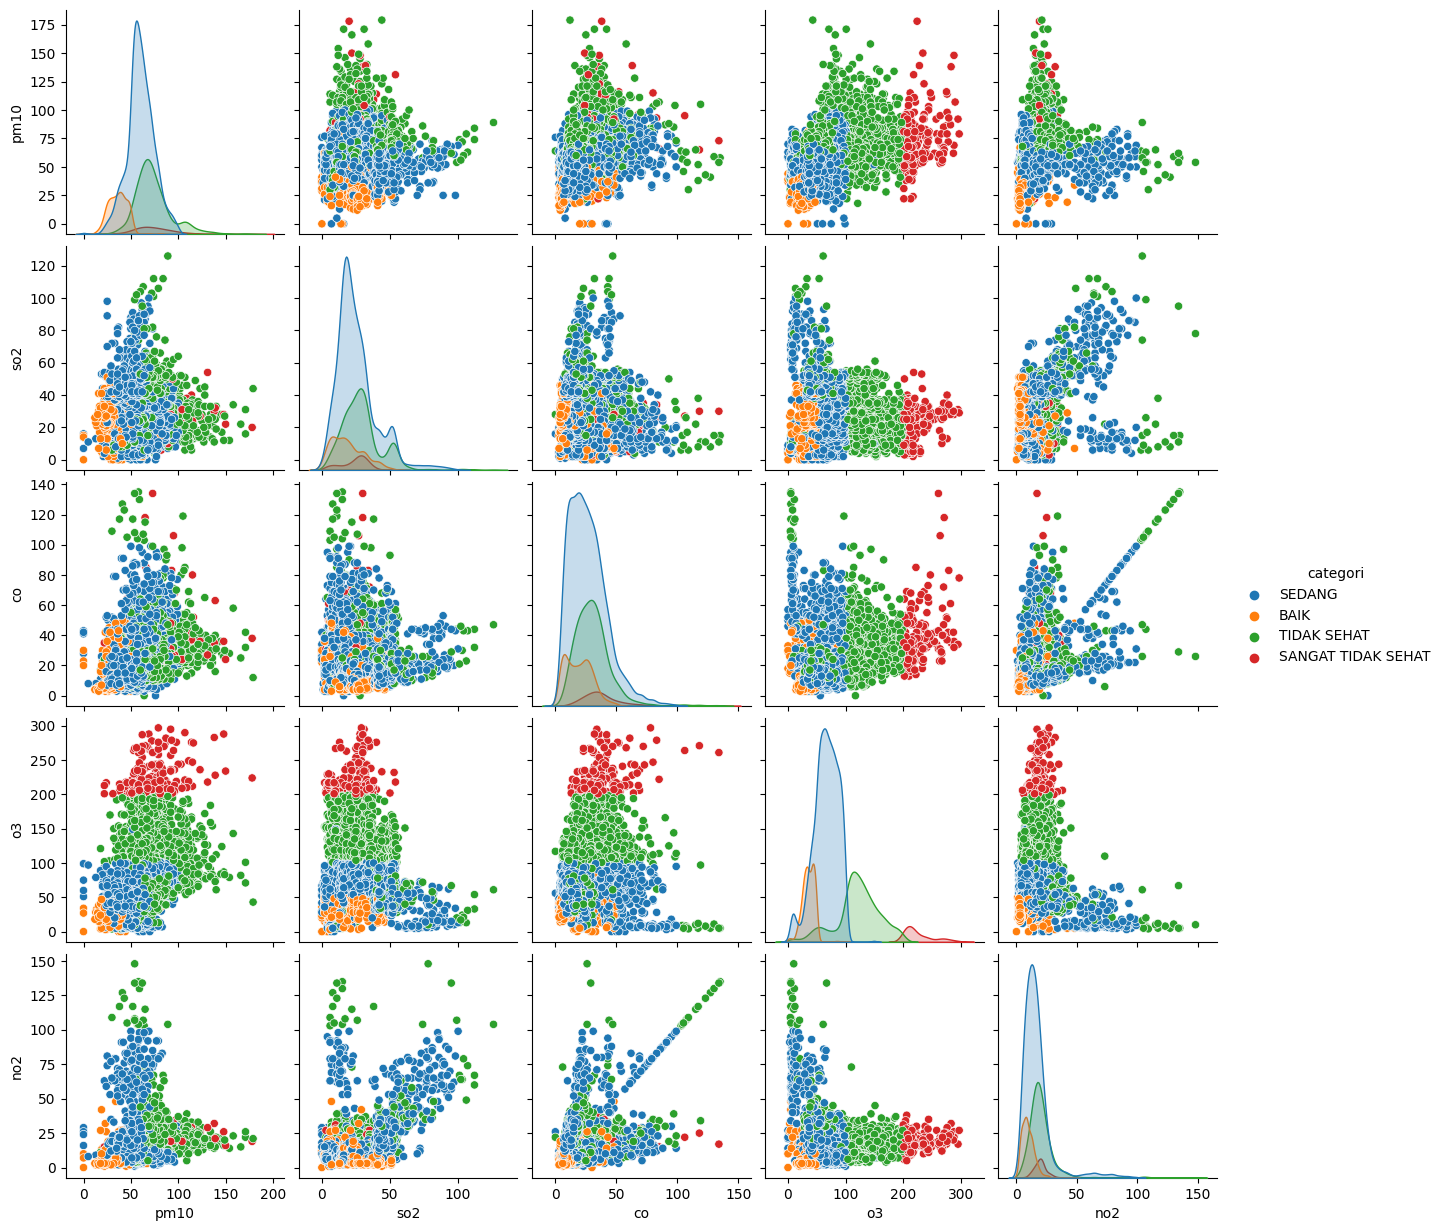

In [355]:
sns.pairplot(df, hue='categori')

# Pearson Correlation

In [356]:
correlations = df.corr()
correlations

<ipython-input-356-4b58c49d872c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


pm10       so2        co        o3       no2
pm10  1.000000  0.115727  0.290066  0.411975  0.186578
so2   0.115727  1.000000 -0.016677 -0.032274  0.393216
co    0.290066 -0.016677  1.000000  0.187629  0.411305
o3    0.411975 -0.032274  0.187629  1.000000 -0.053685
no2   0.186578  0.393216  0.411305 -0.053685  1.000000

<ipython-input-357-eeca4fe65d8a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


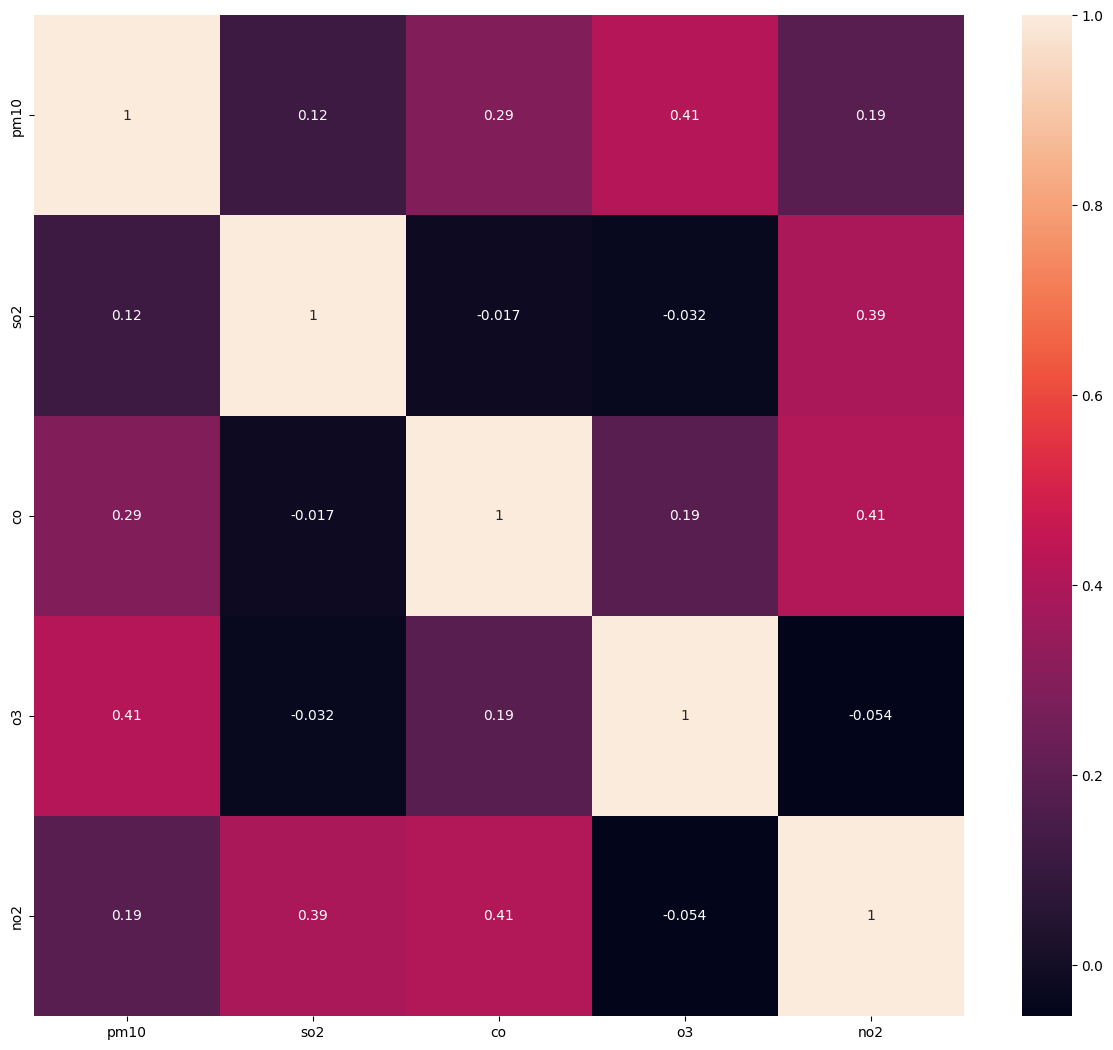

In [357]:
# Membuat heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Preprocessing data

In [358]:
# mendefinisikan variabel X dengan melakukan slicing
# Independent variables
X = df.iloc[:, :-1].values

# mendefinisikan variabel y dengan melakukan slicing
# Dependt variable
y = df.iloc[:, -1].values

In [359]:
print(X)

[[60.  4. 73. 27. 14.]
 [32.  2. 16. 33.  9.]
 [27.  2. 19. 20.  9.]
 ...
 [61. 54. 15. 37. 29.]
 [60. 53. 17. 38. 44.]
 [64. 52. 44. 37. 53.]]


In [360]:
print(y)

['SEDANG' 'BAIK' 'BAIK' ... 'SEDANG' 'TIDAK SEHAT' 'SEDANG']


# Label encoder untuk mengubah data kategorikal menjadi numerikal disini saya menggunakan untuk class (categori)

In [361]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [362]:
print(y)

[2 0 0 ... 2 3 2]


 <B>
 - 0 = BAIK
 - 1 = SANGAT TIDAK SEHAT
 - 2 = SEDANG
 - 3 = TIDAK SEHAT
 </B>

2    2858
3    1221
0     522
1     157

# Splitting dataset menjadi Training dan Test

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print('Shape of Training Set is', (X_train.shape, y_train.shape))
print('Shape of Test Set is', (X_test.shape, y_test.shape))

Shape of Training Set is ((4758, 5), (4758,))
Shape of Test Set is ((1190, 5), (1190,))


In [364]:
import pandas as pd

y_train_series = pd.Series(y_train)

print(y_train_series.value_counts())


2    2858
3    1221
0     522
1     157
dtype: int64


In [365]:
y_test_series = pd.Series(y_test)

print(y_test_series.value_counts())


2    718
3    290
0    140
1     42
dtype: int64


In [366]:
print(y_train)

[0 2 2 ... 2 2 1]


In [367]:
print(y_test)

[2 3 2 ... 0 3 2]


# Melakukan sampling data (oversampling) pada class atau y

In [368]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [369]:
print(X_train.shape, X_test.shape)

(4758, 5) (1190, 5)


In [370]:
# Instantiate the SMOTE algorithm
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [371]:
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)
for class_name, class_count in zip(unique_classes, class_counts):
    print("Class:", class_name, "| Count:", class_count)

Shape of X_train_resampled: (11432, 5)
Shape of y_train_resampled: (11432,)
Class: 0 | Count: 2858
Class: 1 | Count: 2858
Class: 2 | Count: 2858
Class: 3 | Count: 2858


Shape of X_train_resampled: (11432, 5)
Shape of y_train_resampled: (11432,)


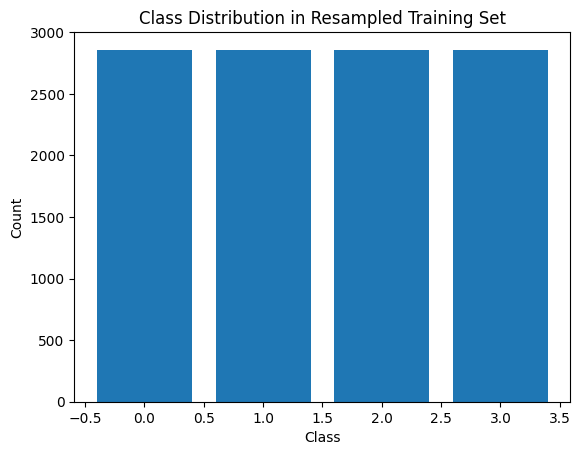

In [372]:
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

unique_classes, class_counts = np.unique(y_train_resampled, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Resampled Training Set')
plt.show()

In [373]:
print(np.shape(X_train_resampled))

(11432, 5)


In [374]:
# sns.countplot(x=X_train_resampled[:, 1])

# Create Model using Decision Tree Algorithm

Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Confusion Matrix:
[[136   0   4   0]
 [  0  42   0   0]
 [ 11   0 693  14]
 [  1   0   7 282]]
F1 Score: 0.9703963316580503
Accuracy Score: 0.9689075630252101
Precision Score: 0.9639991554054054
Recall Score: 0.9772558557569604


<Figure size 1000x1000 with 0 Axes>

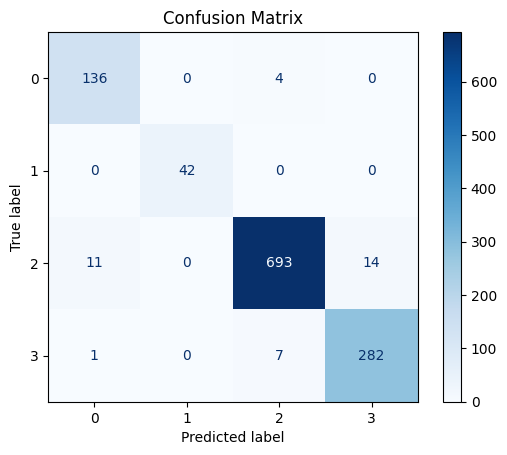

In [375]:
# Create a decision tree classifier (Model)
model = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {'max_depth': [1 , 3, 5, 7, 10, 15, 20],
             'criterion': ['gini', 'entropy']}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print('Best Parameters:', best_params)

# Train the model on the resampled training set with the best parameters
model = DecisionTreeClassifier(**best_params)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Print tevaluation metrics
print('Confusion Matrix:')
print(conf_matrix)
print('F1 Score:', f1)
print('Accuracy Score:', accuracy)
print('Precision Score:', precision)
print('Recall Score:', recall)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [376]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model with criterion 'gini'
# model_gini = DecisionTreeClassifier(criterion='gini', max_depth=10)
# model_gini.fit(X_train, y_train)

# # Make predictions on the test set using 'gini' model
# y_pred_gini = model_gini.predict(X_test)

# # Calculate the evaluation metrics for 'gini' model
# conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
# f1_gini = f1_score(y_test, y_pred_gini, average='macro')
# accuracy_gini = accuracy_score(y_test, y_pred_gini)
# precision_gini = precision_score(y_test, y_pred_gini, average='macro')
# recall_gini = recall_score(y_test, y_pred_gini, average='macro')

# # Print evaluation metrics for 'gini' model
# print('--- Model with criterion "gini" ---')
# print('Confusion Matrix:')
# print(conf_matrix_gini)
# print('F1 Score:', f1_gini)
# print('Accuracy Score:', accuracy_gini)
# print('Precision Score:', precision_gini)
# print('Recall Score:', recall_gini)

# # Train the model with criterion 'entropy'
# model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=10)
# model_entropy.fit(X_train, y_train)

# # Make predictions on the test set using 'entropy' model
# y_pred_entropy = model_entropy.predict(X_test)

# # Calculate the evaluation metrics for 'entropy' model
# conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
# f1_entropy = f1_score(y_test, y_pred_entropy, average='macro')
# accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
# precision_entropy = precision_score(y_test, y_pred_entropy, average='macro')
# recall_entropy = recall_score(y_test, y_pred_entropy, average='macro')

# # Print evaluation metrics for 'entropy' model
# print('--- Model with criterion "entropy" ---')
# print('Confusion Matrix:')
# print(conf_matrix_entropy)
# print('F1 Score:', f1_entropy)
# print('Accuracy Score:', accuracy_entropy)
# print('Precision Score:', precision_entropy)
# print('Recall Score:', recall_entropy)


In [377]:
print(model.predict([[10, 10, 24, 10, 27]]))
print(model.predict([[27,  2, 19, 20,  9]]))
print(model.predict([[64, 52, 44, 37, 53]]))
print(model.predict([[65,	15,	54,	102, 27]]))
print(model.predict([[56,	20,	39,	215,	26]]))

[0]
[0]
[2]
[3]
[1]


# Print Decision Tree

In [378]:
# from sklearn import tree

# plt.figure(figsize=(100, 80) ,dpi=200)
# tree.plot_tree(model, filled=True, feature_names=['pm10', 'so2', 'co', 'o3', 'no2'], class_names=['BAIK', 'SANGAT TIDAK SEHAT', 'SEDANG', 'TIDAK SEHAT'])
# plt.show()


# Validasi akurasi sistim yg dibuat terhadap hasil kondisi lingkungan secara riil

In [379]:
df1 = pd.read_csv(os.path.join(path,"pollutant-standards-index-jogja-2020.csv"))
df1.drop(columns=["Date", "Max", "Critical Component"], inplace=True)
df1.head(10)

PM10  SO2   CO  O3  NO2   Category
0    30    2   69  19    0   Moderate
1    16    2   58  33    0   Moderate
2    12    2   46  18    0       Good
3     8    2   84  29    0   Moderate
4     8    3   50   0    0       Good
5    12    2   97  18    0   Moderate
6    10    3   70   0    0   Moderate
7    11    4   87   0    0   Moderate
8    10    4  118   5    0  Unhealthy
9    10    3   73  30    0   Moderate

In [380]:
df1.info

<bound method DataFrame.info of      PM10  SO2  CO  O3  NO2  Category
0      30    2  69  19    0  Moderate
1      16    2  58  33    0  Moderate
2      12    2  46  18    0      Good
3       8    2  84  29    0  Moderate
4       8    3  50   0    0      Good
..    ...  ...  ..  ..  ...       ...
361    12    1  24   0    0      Good
362     9    0  16   2    0      Good
363     9    0  15  20    0      Good
364     6    0  17  10    0      Good
365     5    0  17  20    0      Good

[366 rows x 6 columns]>

In [381]:
df1["Category"].value_counts()

Good         293
Moderate      67
Unhealthy      6
Name: Category, dtype: int64

In [382]:
df.isnull().any()

pm10        False
so2         False
co          False
o3          False
no2         False
categori    False
dtype: bool

<ipython-input-383-e4b3b6c6d21b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


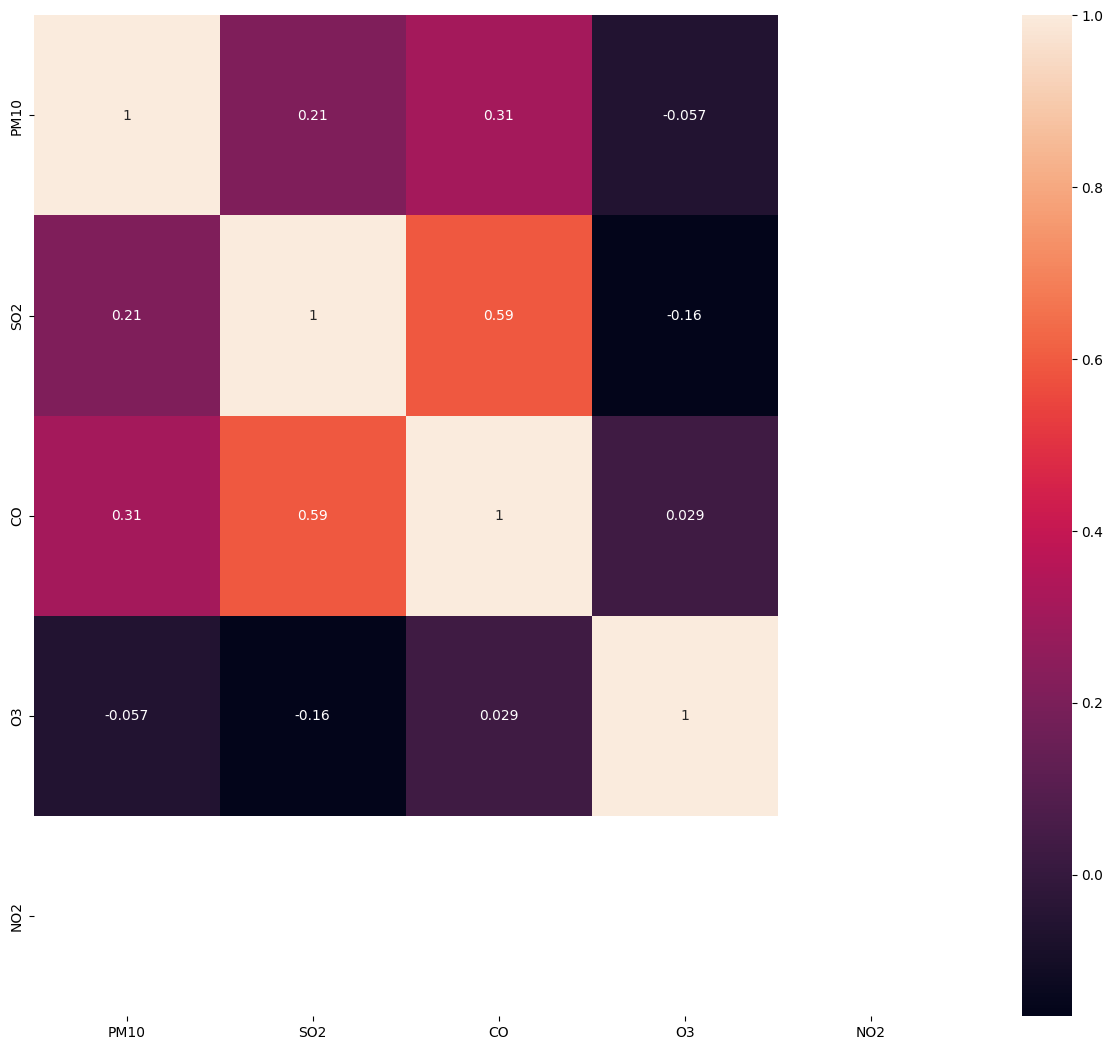

In [383]:
# Membuat heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [384]:
# mendefinisikan variabel X dengan melakukan slicing
# Independent variables
X = df1.iloc[:, :-1].values

# mendefinisikan variabel y dengan melakukan slicing
# Dependt variable
y = df1.iloc[:, -1].values

In [385]:
print(X)

[[30  2 69 19  0]
 [16  2 58 33  0]
 [12  2 46 18  0]
 ...
 [ 9  0 15 20  0]
 [ 6  0 17 10  0]
 [ 5  0 17 20  0]]


In [386]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [387]:
print(y)

[1 1 0 1 0 1 1 1 2 1 0 0 0 0 1 0 1 1 0 0 0 1 1 2 1 0 0 2 1 1 0 0 1 1 1 1 1
 1 1 2 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 2 1 0
 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


0 = Good
1 = Moderate
2 = Unhealthy

In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test_new, y_train, y_test_new = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [389]:
# Mengecek jumlah data yang displitting antara train dan test
X_train.shape, X_test_new.shape, y_train.shape, y_test_new.shape

((292, 5), (74, 5), (292,), (74,))

In [390]:
print(X_train)

[[24  2 69 22  0]
 [16  0  3 21  0]
 [ 7  0 19 20  0]
 ...
 [25  1 22 28  0]
 [11  3 39 11  0]
 [19  1 22  3  0]]


In [391]:
print(X_test_new)

[[60  2 50 16  0]
 [14  0 11 18  0]
 [22  2 81 30  0]
 [29  2 47 20  0]
 [22  2 34 18  0]
 [10  1 19 63  0]
 [18  1 18 12  0]
 [11  0 18 25  0]
 [21  1 22 27  0]
 [10  3 70  0  0]
 [32  1 37 14  0]
 [22  1 36  0  0]
 [23  0 12 20  0]
 [14  0 16 14  0]
 [ 8  0 20 16  0]
 [13  1  5 11  0]
 [15  0 14 19  0]
 [19  1 47  0  0]
 [39  0 20 37  0]
 [10  2 14  0  0]
 [14  1 33 14  0]
 [17  0 12 11  0]
 [25  2 12  0  0]
 [22  0 39 20  0]
 [16  1 25  6  0]
 [20  0 11 19  0]
 [10  2 56 11  0]
 [19  0 20 28  0]
 [32  1 27 10  0]
 [14  1 16 11  0]
 [40  1 35 11  0]
 [20  1 38  0  0]
 [13  2 45  0  0]
 [19  2 51 10  0]
 [45  2 37 10  0]
 [12  2 97 18  0]
 [19  2 37  0  0]
 [15  1 53  9  0]
 [13  0  6 15  0]
 [ 3  2 19  0  0]
 [14  2 46  0  0]
 [24  0 20 11  0]
 [18  1  7  7  0]
 [21  0 22 24  0]
 [21  2 48 11  0]
 [19  0 23 33  0]
 [20  1  0  0  0]
 [22  1  2  0  0]
 [21  0 11 23  0]
 [19  4 21 20  0]
 [19  1 23  0  0]
 [20  1 12 49  0]
 [37  0 16 22  0]
 [20  1 25  8  0]
 [42  1 48 20  0]
 [29  2 60

In [392]:
print(y_test_new)

[1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1]


In [393]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test_new = sc.transform(X_test_new)

In [394]:
# Membuat prediksi pada dataset baru
y_pred_new = model.predict(X_test_new)

In [395]:
print(y_pred_new)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [396]:
conf_matrix_new = confusion_matrix(y_test_new, y_pred_new)
f1_new = f1_score(y_test_new, y_pred_new, average='macro')
accuracy_new = accuracy_score(y_test_new, y_pred_new)
precision_new = precision_score(y_test_new, y_pred_new, average='macro')
recall_new = recall_score(y_test_new, y_pred_new, average='macro')

print('Confusion Matrix (Dataset Yogyakarta):')
print(conf_matrix_new)
print('F1 Score (Dataset Yogyakarta):', f1_new)
print('Accuracy Score (Dataset Yogyakarta):', accuracy_new)
print('Precision Score (Dataset Yogyakarta):', precision_new)
print('Recall Score (Dataset Yogyakarta):', recall_new)

Confusion Matrix (Dataset Yogyakarta):
[[61  0]
 [13  0]]
F1 Score (Dataset Yogyakarta): 0.45185185185185184
Accuracy Score (Dataset Yogyakarta): 0.8243243243243243
Precision Score (Dataset Yogyakarta): 0.41216216216216217
Recall Score (Dataset Yogyakarta): 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Data Jakarta

In [397]:
df2 = pd.read_csv(os.path.join(path,"ispu-jakarta.csv"))

df2.head(10)

pm10  so2    co    o3   no2 categori
0  60.0  4.0  73.0  27.0  14.0   SEDANG
1  32.0  2.0  16.0  33.0   9.0     BAIK
2  27.0  2.0  19.0  20.0   9.0     BAIK
3  22.0  2.0  16.0  15.0   6.0     BAIK
4  25.0  2.0  17.0  15.0   8.0     BAIK
5  30.0  3.0  22.0  19.0  11.0     BAIK
6  41.0  4.0  24.0  27.0  13.0     BAIK
7  64.0  8.0  51.0  19.0  15.0   SEDANG
8  55.0  5.0  39.0  23.0  16.0   SEDANG
9  34.0  5.0  23.0  26.0  12.0     BAIK

In [398]:
df2.info

<bound method DataFrame.info of       pm10   so2    co    o3   no2     categori
0     60.0   4.0  73.0  27.0  14.0       SEDANG
1     32.0   2.0  16.0  33.0   9.0         BAIK
2     27.0   2.0  19.0  20.0   9.0         BAIK
3     22.0   2.0  16.0  15.0   6.0         BAIK
4     25.0   2.0  17.0  15.0   8.0         BAIK
...    ...   ...   ...   ...   ...          ...
5943  75.0  61.0  23.0  40.0  47.0  TIDAK SEHAT
5944  59.0  53.0  16.0  34.0  33.0       SEDANG
5945  61.0  54.0  15.0  37.0  29.0       SEDANG
5946  60.0  53.0  17.0  38.0  44.0  TIDAK SEHAT
5947  64.0  52.0  44.0  37.0  53.0       SEDANG

[5948 rows x 6 columns]>

In [399]:
df2.isnull().any()

pm10        False
so2         False
co          False
o3          False
no2         False
categori    False
dtype: bool

In [400]:
# mendefinisikan variabel X dengan melakukan slicing
# Independent variables
X = df2.iloc[:, :-1].values

# mendefinisikan variabel y dengan melakukan slicing
# Dependt variable
y = df2.iloc[:, -1].values

In [401]:
print(X)

[[60.  4. 73. 27. 14.]
 [32.  2. 16. 33.  9.]
 [27.  2. 19. 20.  9.]
 ...
 [61. 54. 15. 37. 29.]
 [60. 53. 17. 38. 44.]
 [64. 52. 44. 37. 53.]]


In [402]:
print(y)

['SEDANG' 'BAIK' 'BAIK' ... 'SEDANG' 'TIDAK SEHAT' 'SEDANG']


In [403]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [404]:
print(y)

[2 0 0 ... 2 3 2]


In [405]:
from sklearn.model_selection import train_test_split
X_train, X_test_new1, y_train, y_test_new1 = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [406]:
X_train.shape, X_test_new1.shape, y_train.shape, y_test_new1.shape

((4758, 5), (1190, 5), (4758,), (1190,))

In [407]:
y_pred_new1 = model.predict(X_test_new1)

In [408]:
print(y_pred_new1)

[2 2 2 ... 3 0 2]


In [409]:
conf_matrix_new = confusion_matrix(y_test_new1, y_pred_new1)
f1_new = f1_score(y_test_new1, y_pred_new1, average='macro')
accuracy_new = accuracy_score(y_test_new1, y_pred_new1)
precision_new = precision_score(y_test_new1, y_pred_new1, average='macro')
recall_new = recall_score(y_test_new1, y_pred_new1, average='macro')

print('Confusion Matrix (Dataset Jakarta):')
print(conf_matrix_new)
print('F1 Score (Dataset Jakarta):', f1_new)
print('Accuracy Score (Dataset Jakarta):', accuracy_new)
print('Precision Score (Dataset Jakarta):', precision_new)
print('Recall Score (Dataset Jakarta):', recall_new)

Confusion Matrix (Dataset Jakarta):
[[137   0   2   0]
 [  0  39   0   0]
 [  9   0 701   7]
 [  0   0   6 289]]
F1 Score (Dataset Jakarta): 0.9806441495841325
Accuracy Score (Dataset Jakarta): 0.9798319327731092
Precision Score (Dataset Jakarta): 0.9758560044626422
Recall Score (Dataset Jakarta): 0.9857393313772498


# Save Model

In [410]:
# import joblib

# joblib.dump(model, 'dt.sav')


# Load Model

In [411]:
# import joblib

# loaded_model = joblib.load('dt.sav')


In [412]:
# print(loaded_model.predict(X_test))

In [413]:
# model.predict([[65, 15, 54, 102, 27]])